In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/EOS/labelled_dysx.csv')

In [ ]:
df.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2


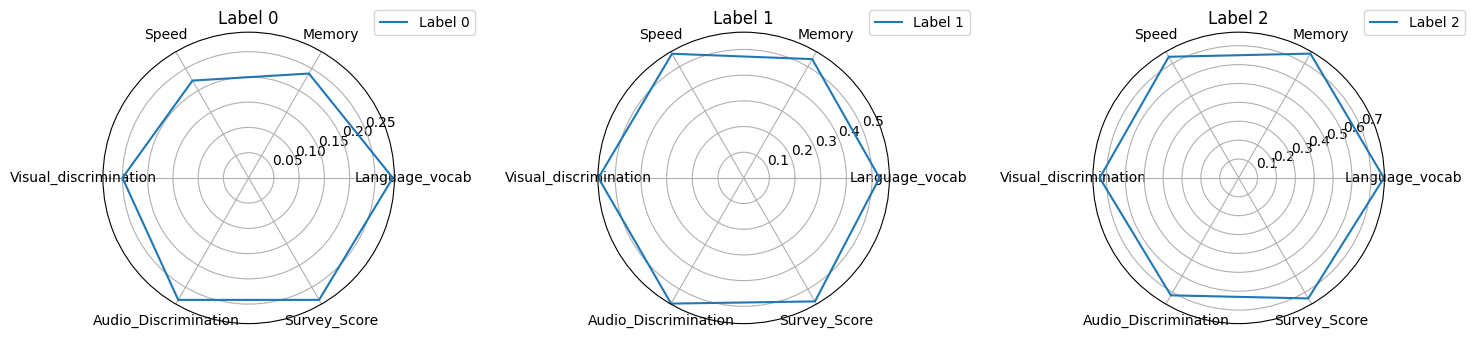

In [ ]:
#Help from chat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the lables
labels = [0, 1, 2]

# Create subplots for each label
fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(15, 5), subplot_kw=dict(polar=True))

# Calculate mean values for each feature grouped by label
mean_values = df.groupby('Label').mean()

num_features = len(mean_values.columns)

# Iterate over each label and create a spider chart
for i, label in enumerate(labels):
    ax = axes[i]

    # Define angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    values = mean_values.loc[label].values.tolist()
    values += [values[0]]

    # Plot the spider chart
    ax.plot(angles, values, label=f'Label {label}')

    ax.set_thetagrids(np.degrees(angles[:-1]), mean_values.columns)

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    ax.set_title(f"Label {label}")

plt.tight_layout()
plt.show()

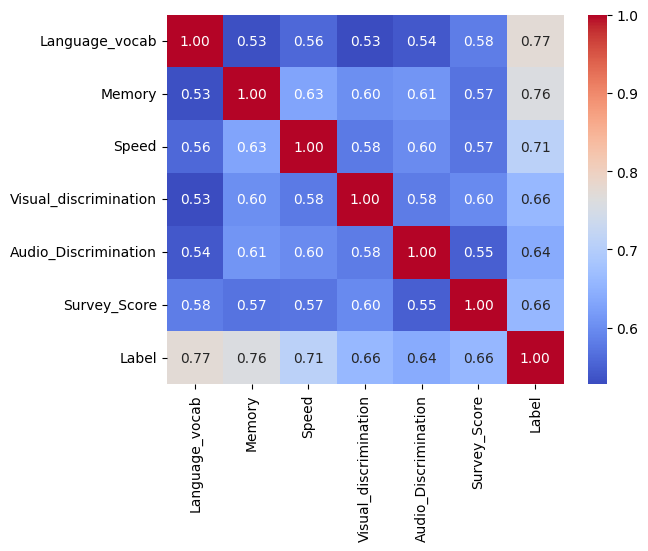

In [ ]:
#Heatmap
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

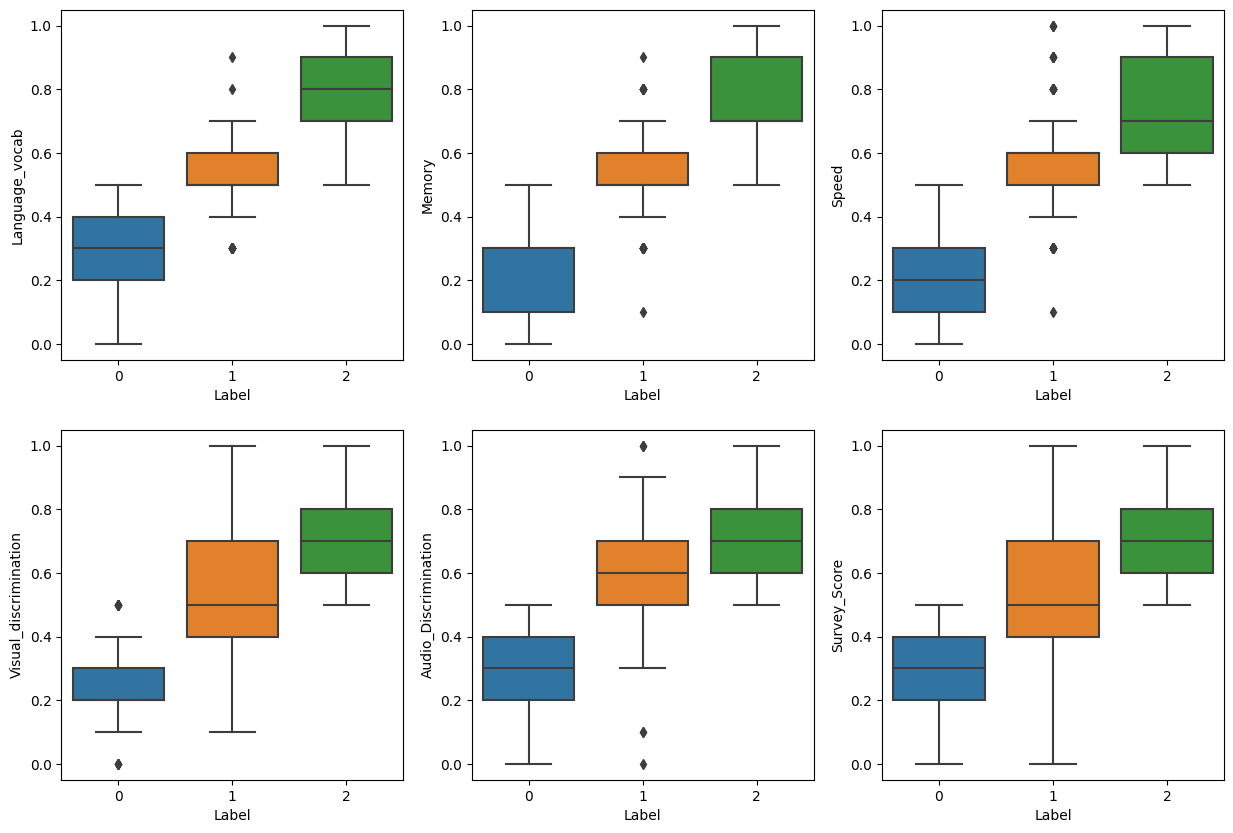

In [ ]:
#Box and whisker plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='Label', y=col, data=df, ax=axes[i // 3, i % 3])

plt.show()


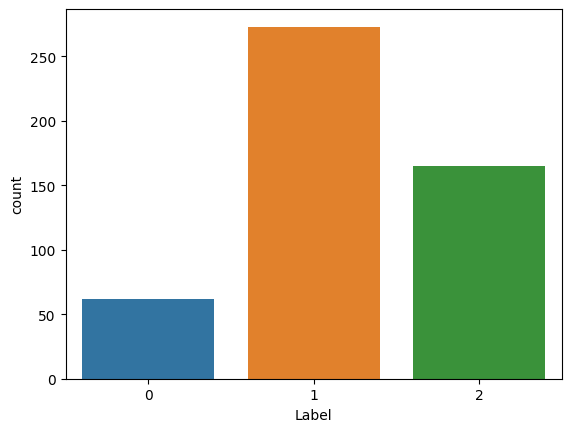

In [ ]:
#Bar graph
sns.countplot(x='Label', data=df)
plt.show()

In [ ]:
#Help from Chat
#Interactable bar graph
!pip install plotly
import plotly.express as px

mean_values = df.groupby('Label').mean().reset_index()

mean_values_melted = mean_values.melt(id_vars='Label', var_name='Feature', value_name='Mean Value')

fig = px.bar(mean_values_melted, x='Feature', y='Mean Value', color='Label',
             labels={'Label': 'Class Label'}, title='Mean Values of Features for Each Class',
             hover_data=['Feature', 'Mean Value'], barmode='group')

fig.show()

In [ ]:
df.size

3500

In [ ]:
df.shape

(500, 7)

In [ ]:
df.describe()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,0.57800,0.572000,0.576800,0.58260,0.580200,0.581000,1.206000
std,0.20019,0.212382,0.215487,0.21719,0.202163,0.210684,0.642175
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.50000,0.400000,0.500000,0.50000,0.500000,0.500000,1.000000
50%,0.60000,0.600000,0.600000,0.60000,0.600000,0.600000,1.000000
75%,0.70000,0.700000,0.700000,0.70000,0.700000,0.700000,2.000000
max,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [ ]:
df.dtypes.head(7)

Language_vocab           float64
Memory                   float64
Speed                    float64
Visual_discrimination    float64
Audio_Discrimination     float64
Survey_Score             float64
Label                      int64
dtype: object

In [ ]:
#Checking balance
class_counts = df['Label'].value_counts()
print(class_counts)

1    273
2    165
0     62
Name: Label, dtype: int64


In [ ]:
df.columns

Index(['Language_vocab', 'Memory', 'Speed', 'Visual_discrimination',
       'Audio_Discrimination', 'Survey_Score', 'Label'],
      dtype='object')

In [ ]:
df.isna().sum().head(7)

Language_vocab           0
Memory                   0
Speed                    0
Visual_discrimination    0
Audio_Discrimination     0
Survey_Score             0
Label                    0
dtype: int64

In [ ]:
features = ['Language_vocab', 'Memory', 'Speed', 'Visual_discrimination',
       'Audio_Discrimination', 'Survey_Score']

In [ ]:
X = df[features]
y = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
features = ['Language_vocab', 'Memory', 'Speed', 'Visual_discrimination', 'Audio_Discrimination', 'Survey_Score']
X = df[features]
y = df['Label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Logistic Regression model with balanced weights for each class
lr = LogisticRegression(class_weight='balanced', solver='newton-cg', random_state=42)

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [ ]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.98
